## Importing the Training Set and the Test Set ##

In [21]:
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.25)
sns.set_style('darkgrid')

In [22]:
dataset_train = pd.read_csv("hayes-roth.data", names=["hobby","age","edu_level","marital_status","class"], header=None)
dataset_test = pd.read_csv("hayes-roth.test", names=["hobby","age","edu_level","marital_status","class"], header=None)
print(dataset_train.head()) 
print("-"*20)
dataset_train.info()

     hobby  age  edu_level  marital_status  class
92       2    1          1               2      1
10       2    1          3               2      2
83       3    1          4               1      3
61       2    4          2               2      3
107      1    1          3               4      3
--------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 92 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   hobby           132 non-null    int64
 1   age             132 non-null    int64
 2   edu_level       132 non-null    int64
 3   marital_status  132 non-null    int64
 4   class           132 non-null    int64
dtypes: int64(5)
memory usage: 6.2 KB


In [23]:
print(dataset_test.head())
print("-"*20)
dataset_test.info()

   hobby  age  edu_level  marital_status  class
0      1    1          1               2      1
1      1    1          2               1      1
2      1    2          1               1      1
3      1    1          1               3      1
4      1    1          3               1      1
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   hobby           28 non-null     int64
 1   age             28 non-null     int64
 2   edu_level       28 non-null     int64
 3   marital_status  28 non-null     int64
 4   class           28 non-null     int64
dtypes: int64(5)
memory usage: 1.2 KB


In [24]:
X_train = dataset_train.drop(columns=["class"]).copy()
y_train = dataset_train["class"].copy()
X_test = dataset_test.drop(columns=["class"]).copy()
y_test = dataset_test["class"].copy()

## EDA ##

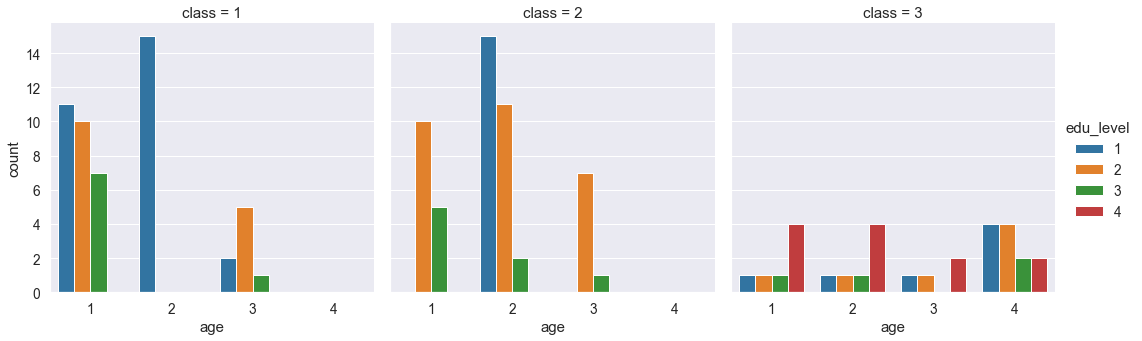

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
dataset_eda = dataset_train.copy()
sns.catplot(data=dataset_eda, x='age', col='class', hue='edu_level', kind='count')

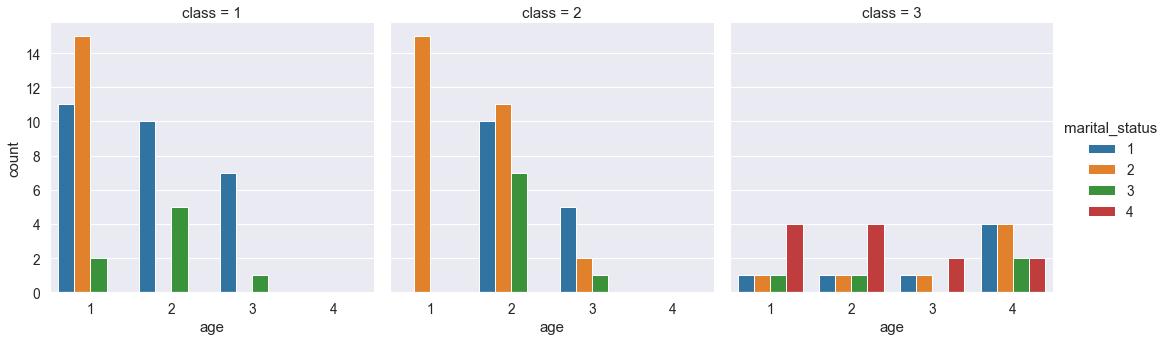

In [26]:
sns.catplot(data=dataset_eda, x='age', col='class', hue='marital_status', kind='count')

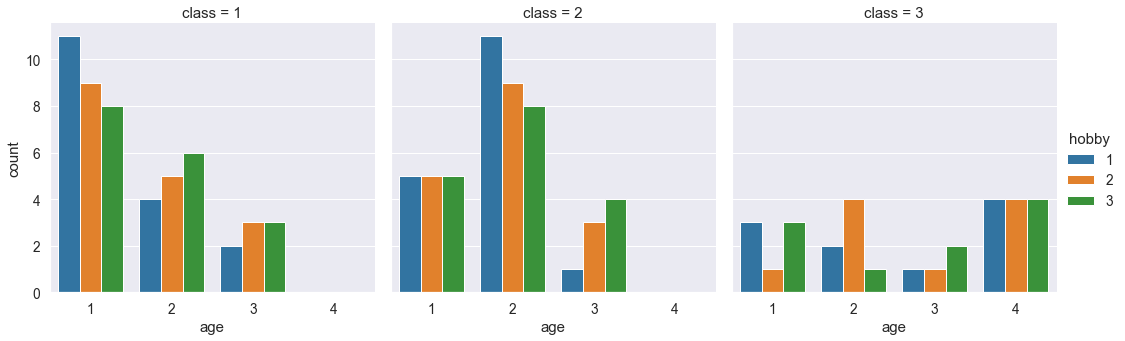

In [27]:
sns.catplot(data=dataset_eda, x='age', col='class', hue='hobby', kind='count')

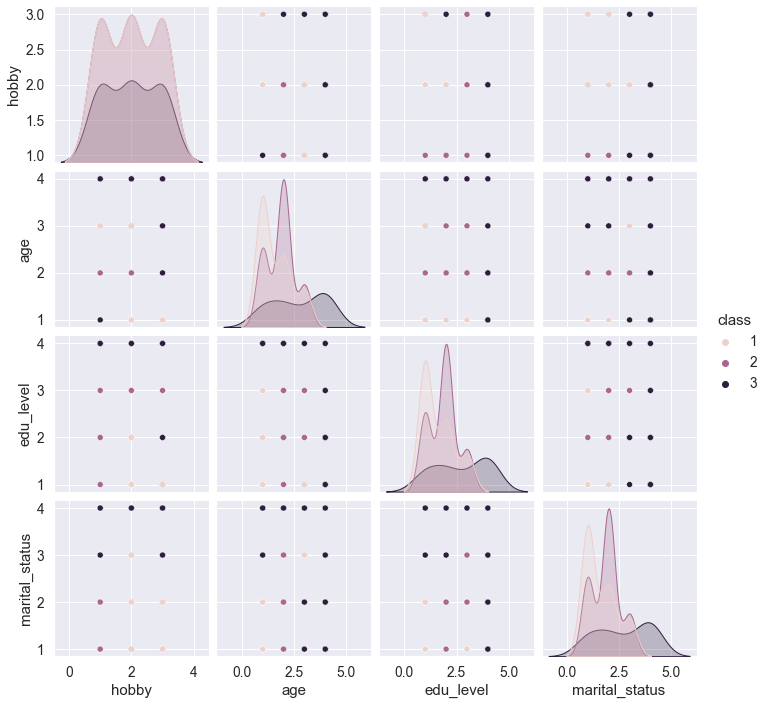

In [28]:
sns.pairplot(data=dataset_eda, hue='class')

## Decision Tree Model ##

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
dt_classifier.get_depth()

10

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
str1 = "Test set"
y_pred = dt_classifier.predict(X_test)
print(20*'-' + str1 + (40-len(str1))*'-')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
str2 = "Training set"
y_pred2 = dt_classifier.predict(X_train)
print(20*'-' + str2 + (40-len(str2))*'-')
print(confusion_matrix(y_train, y_pred2))
print(classification_report(y_train, y_pred2))

--------------------Test set--------------------------------
[[11  3  0]
 [ 1 12  0]
 [ 0  0  1]]
              precision    recall  f1-score   support

           1       0.92      0.79      0.85        14
           2       0.80      0.92      0.86        13
           3       1.00      1.00      1.00         1

    accuracy                           0.86        28
   macro avg       0.91      0.90      0.90        28
weighted avg       0.87      0.86      0.86        28

--------------------Training set----------------------------
[[48  3  0]
 [ 9 42  0]
 [ 0  0 30]]
              precision    recall  f1-score   support

           1       0.84      0.94      0.89        51
           2       0.93      0.82      0.87        51
           3       1.00      1.00      1.00        30

    accuracy                           0.91       132
   macro avg       0.93      0.92      0.92       132
weighted avg       0.91      0.91      0.91       132



## 5-Fold Cross Validation for Tuing Depth Hyperparameter

In [32]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': range(1,11)}
scoring = 'accuracy'

dt_classifier_grid = DecisionTreeClassifier()
dt_gridsearch = GridSearchCV(dt_classifier_grid, param_grid = params, scoring = scoring)
dt_gridsearch.fit(X_train, y_train)

print("Optimal Depth:", dt_gridsearch.best_estimator_.max_depth)
print("validation accuracy score: {0:0.3f}".format(dt_gridsearch.best_score_))

Optimal Depth: 6
validation accuracy score: 0.864


In [33]:
print("Validation accuracy score for Descision Tree with Depth 10: {0:0.3f}".format(dt_gridsearch.cv_results_['mean_test_score'][9]))

Validation accuracy score for Descision Tree with Depth 10: 0.834


In [34]:
dt_optimaldepth_classifier = DecisionTreeClassifier(max_depth = 6, random_state = 0)
dt_optimaldepth_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [35]:
str1 = "Test set"
y_pred_opt = dt_optimaldepth_classifier.predict(X_test)
print(20*'-' + str1 + (40-len(str1))*'-')
print(confusion_matrix(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt))
str2 = "Training set"
y_pred_opt2 = dt_optimaldepth_classifier.predict(X_train)
print(20*'-' + str2 + (40-len(str2))*'-')
print(confusion_matrix(y_train, y_pred_opt2))
print(classification_report(y_train, y_pred_opt2))

--------------------Test set--------------------------------
[[ 7  7  0]
 [ 0 13  0]
 [ 0  0  1]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67        14
           2       0.65      1.00      0.79        13
           3       1.00      1.00      1.00         1

    accuracy                           0.75        28
   macro avg       0.88      0.83      0.82        28
weighted avg       0.84      0.75      0.73        28

--------------------Training set----------------------------
[[33 18  0]
 [ 0 51  0]
 [ 0  0 30]]
              precision    recall  f1-score   support

           1       1.00      0.65      0.79        51
           2       0.74      1.00      0.85        51
           3       1.00      1.00      1.00        30

    accuracy                           0.86       132
   macro avg       0.91      0.88      0.88       132
weighted avg       0.90      0.86      0.86       132



## Voting Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import VotingClassifier 

seed = 49
estimators = [('rf',RandomForestClassifier(n_estimators=10, random_state=seed)),
              ('if', ExtraTreesClassifier(n_estimators=10, random_state=seed)),
              ('cnb', CategoricalNB())]
voter = VotingClassifier(estimators=estimators)
voter.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=49)),
                             ('if',
                              ExtraTreesClassifier(n_estimators=10,
                                                   random_state=49)),
                             ('cnb', CategoricalNB())])

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = voter.predict(X_test)
y_pred2 = voter.predict(X_train)
str1 = 'Test set'
print('-'*20 + str1 +'-'*(40-len(str1)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
str2 = 'Training set'
print('-'*20 + str2 +'-'*(40-len(str2)))
print(confusion_matrix(y_train, y_pred2))
print(classification_report(y_train, y_pred2))

--------------------Test set--------------------------------
[[13  1  0]
 [ 2 11  0]
 [ 0  0  1]]
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.92      0.85      0.88        13
           3       1.00      1.00      1.00         1

    accuracy                           0.89        28
   macro avg       0.93      0.92      0.93        28
weighted avg       0.89      0.89      0.89        28

--------------------Training set----------------------------
[[48  3  0]
 [ 9 42  0]
 [ 0  0 30]]
              precision    recall  f1-score   support

           1       0.84      0.94      0.89        51
           2       0.93      0.82      0.87        51
           3       1.00      1.00      1.00        30

    accuracy                           0.91       132
   macro avg       0.93      0.92      0.92       132
weighted avg       0.91      0.91      0.91       132

